# Loudness Function Fit Example
BTUX vs BTX fitting, applied to jittered loudness data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fit_loudness_function import fit_loudness_function
from loudness_function import loudness_function_Lcut

np.random.seed(42)
plt.rcParams["figure.figsize"] = (7, 5)

In [2]:
# Listener response data points
levels = np.array([18, 22, 26, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85], dtype=float)
cu = np.array([0, 3, 4, 5, 8, 10, 12, 15, 18, 22, 26, 30, 38, 45, 50], dtype=float)

# 10% random jitter on x-axis
jitter_factor = 1.0 + 0.1 * (2 * np.random.rand(len(levels)) - 1)
levels_jittered = levels * jitter_factor

measured_data_jittered = np.empty(levels.size * 2)
measured_data_jittered[0::2] = levels_jittered
measured_data_jittered[1::2] = cu

In [3]:
def fit_curve(measured_data, fit_mode, optAlg="NEL", defaultUpperSlope=1.39):
    params = fit_loudness_function(
        measured_data,
        fit_mode=fit_mode,
        optAlg=optAlg,
        defaultUpperSlope=defaultUpperSlope,
    )
    return params

def truncate_to_50_cu(x_vals, y_vals):
    mask = y_vals < 50
    if not mask.any():
        return x_vals[:1], y_vals[:1]
    x_sub = x_vals[mask]
    y_sub = y_vals[mask]
    ge_mask = y_vals >= 50
    if ge_mask.any():
        first_ge = np.argmax(ge_mask)
        x_sub = np.append(x_sub, x_vals[first_ge])
        y_sub = np.append(y_sub, y_vals[first_ge])
    return x_sub, y_sub

In [4]:
# Fit using BTUX and BTX
params_btux = fit_curve(measured_data_jittered, fit_mode="BTUX")
params_btx = fit_curve(measured_data_jittered, fit_mode="BTX")

print("BTUX params [Lcut, m_low, m_high]:", params_btux)
print("BTX params  [Lcut, m_low, m_high]:", params_btx)

Fitting method BTUX: not enough data points in the upper loudness range. m_high was fixed to 1.39 CU/dB
BTUX params [Lcut, m_low, m_high]: [np.float64(67.96238036685679), np.float64(0.47672440612817396), np.float64(1.39)]
BTX params  [Lcut, m_low, m_high]: [np.float64(68.23570998852564), np.float64(0.47397947718768874), np.float64(1.481904211842373)]


In [5]:
# Generate fitted curves
x_fit = np.linspace(levels_jittered.min(), 100, 400)
y_btux = loudness_function_Lcut(x_fit, params_btux)
y_btx = loudness_function_Lcut(x_fit, params_btx)

x_btux, y_btux = truncate_to_50_cu(x_fit, y_btux)
x_btx, y_btx = truncate_to_50_cu(x_fit, y_btx)

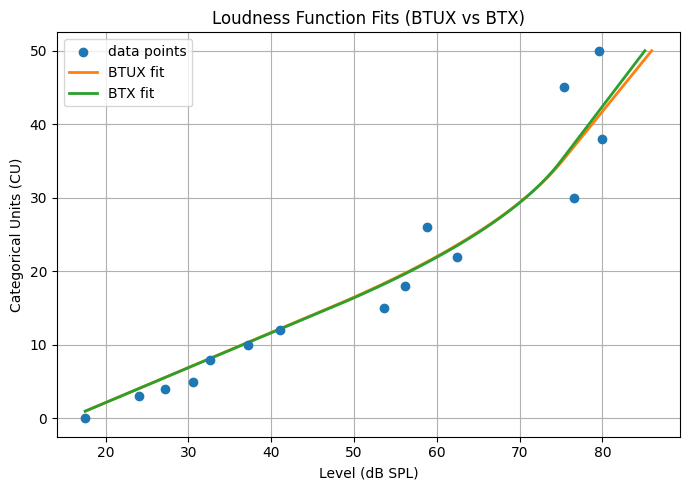

In [6]:
# Plot comparison
plt.scatter(levels_jittered, cu, label="data points", zorder=3, color="tab:blue")
plt.plot(x_btux, y_btux, label="BTUX fit", linewidth=2, color="tab:orange")
plt.plot(x_btx, y_btx, label="BTX fit", linewidth=2, color="tab:green")
plt.xlabel("Level (dB SPL)")
plt.ylabel("Categorical Units (CU)")
plt.title("Loudness Function Fits (BTUX vs BTX)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()